In [1]:
import torch
import torch.nn as nn

In [2]:
from tqdm.auto import tqdm

/Users/matiasmolinolo/anaconda3/envs/iag/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
in_size = 28*28
hidden_size = 192

In [4]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: (x >= 0.5).float(),
])

original_train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
original_test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

filter_digit = 1

filtered_train_dataset = [item for item in original_train_dataset if item[1] == filter_digit]
filtered_test_dataset = [item for item in original_test_dataset if item[1] == filter_digit]

filtered_dataset = filtered_train_dataset + filtered_test_dataset

data_loader = DataLoader(filtered_dataset, batch_size=64, shuffle=True, num_workers=2, multiprocessing_context='fork')

In [6]:
import matplotlib.pyplot as plt

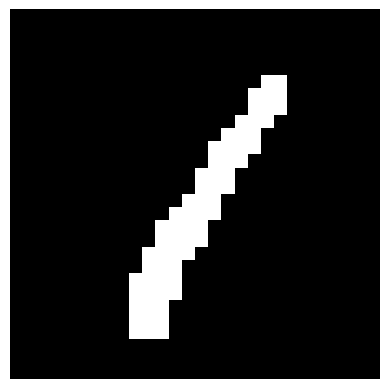

In [7]:
plt.imshow(filtered_dataset[0][0].squeeze(), cmap='gray')
plt.axis('off')
plt.show()

In [8]:
device = torch.device('cpu')

In [13]:
class NADE(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(NADE, self).__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size

        self.V = nn.Parameter(torch.randn(self.input_dim, self.hidden_size)) #out
        self.b = nn.Parameter(torch.randn(self.input_dim)) #out bias

        self.W = nn.Parameter(torch.randn(self.hidden_size, self.input_dim)) #hidden
        self.c = nn.Parameter(torch.randn(self.hidden_size)) #hidden bias

    def forward(self, x):
        a = self.c.expand(x.shape[0], -1)

        p_x_hat = []

        for d in range(self.input_dim):
            h_d = torch.sigmoid(a)
            p = torch.sigmoid(h_d @ self.V[d:d+1, :].t() + self.b[d:d+1])
            p_x_hat.append(p)
            a = x[:, d:d+1] @ self.W[:, d:d+1].t() + a

        probs = torch.cat(p_x_hat, 1)
        return probs

In [14]:
nade = NADE(in_size, hidden_size).to(device)

In [15]:
criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(nade.parameters(), lr=0.001)

In [16]:
from timeit import default_timer as timer

epochs = 50
for epoch in range(epochs):
    t0 = timer()
    epoch_loss = 0
    for batch, (data, _) in enumerate(tqdm(data_loader)):
        data = data.view(-1, in_size).to(device)

        optimizer.zero_grad()
        output = nade(data)
        loss = criterion(output.to(device), data)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

    t1 = timer()
    print(f'Epoch: {epoch + 1}, Loss: {epoch_loss/len(data_loader)}, Time taken: {(t1 - t0):.2f} s')

100%|██████████| 124/124 [00:41<00:00,  3.01it/s]


Epoch: 1, Loss: 2.2355580262599455, Time taken: 41.19 s


100%|██████████| 124/124 [00:42<00:00,  2.91it/s]


Epoch: 2, Loss: 0.5033259129812641, Time taken: 42.56 s


100%|██████████| 124/124 [00:41<00:00,  2.98it/s]


Epoch: 3, Loss: 0.3980136915080009, Time taken: 41.63 s


100%|██████████| 124/124 [00:42<00:00,  2.90it/s]


Epoch: 4, Loss: 0.3689427431071958, Time taken: 42.83 s


100%|██████████| 124/124 [00:44<00:00,  2.81it/s]


Epoch: 5, Loss: 0.35382360195921314, Time taken: 44.12 s


100%|██████████| 124/124 [00:41<00:00,  3.01it/s]


Epoch: 6, Loss: 0.34420773747467226, Time taken: 41.23 s


100%|██████████| 124/124 [00:39<00:00,  3.17it/s]


Epoch: 7, Loss: 0.3362273814216737, Time taken: 39.11 s


100%|██████████| 124/124 [00:41<00:00,  3.02it/s]


Epoch: 8, Loss: 0.3308047565721696, Time taken: 41.07 s


100%|██████████| 124/124 [00:43<00:00,  2.86it/s]


Epoch: 9, Loss: 0.3263841607878285, Time taken: 43.41 s


100%|██████████| 124/124 [00:41<00:00,  2.96it/s]


Epoch: 10, Loss: 0.3234651268970582, Time taken: 41.86 s


100%|██████████| 124/124 [00:46<00:00,  2.68it/s]


Epoch: 11, Loss: 0.32021662208341783, Time taken: 46.31 s


100%|██████████| 124/124 [00:41<00:00,  2.96it/s]


Epoch: 12, Loss: 0.3176815471341533, Time taken: 41.83 s


100%|██████████| 124/124 [00:42<00:00,  2.94it/s]


Epoch: 13, Loss: 0.31532344991160977, Time taken: 42.15 s


100%|██████████| 124/124 [00:41<00:00,  2.96it/s]


Epoch: 14, Loss: 0.31348968489516166, Time taken: 41.97 s


100%|██████████| 124/124 [00:43<00:00,  2.84it/s]


Epoch: 15, Loss: 0.31182991040329777, Time taken: 43.67 s


100%|██████████| 124/124 [00:44<00:00,  2.77it/s]


Epoch: 16, Loss: 0.3104919108652299, Time taken: 44.84 s


100%|██████████| 124/124 [00:43<00:00,  2.86it/s]


Epoch: 17, Loss: 0.30927462563399344, Time taken: 43.30 s


100%|██████████| 124/124 [00:42<00:00,  2.94it/s]


Epoch: 18, Loss: 0.30813477596928995, Time taken: 42.21 s


100%|██████████| 124/124 [00:42<00:00,  2.94it/s]


Epoch: 19, Loss: 0.3069017817897181, Time taken: 42.13 s


100%|██████████| 124/124 [00:49<00:00,  2.49it/s]


Epoch: 20, Loss: 0.3059610553806828, Time taken: 49.87 s


100%|██████████| 124/124 [00:42<00:00,  2.91it/s]


Epoch: 21, Loss: 0.3051010562527564, Time taken: 42.65 s


100%|██████████| 124/124 [00:40<00:00,  3.03it/s]


Epoch: 22, Loss: 0.3042547911886246, Time taken: 40.95 s


100%|██████████| 124/124 [00:43<00:00,  2.84it/s]


Epoch: 23, Loss: 0.3034916125958966, Time taken: 43.66 s


100%|██████████| 124/124 [00:42<00:00,  2.93it/s]


Epoch: 24, Loss: 0.3032449606445528, Time taken: 42.30 s


100%|██████████| 124/124 [00:43<00:00,  2.84it/s]


Epoch: 25, Loss: 0.30212980941418677, Time taken: 43.73 s


100%|██████████| 124/124 [00:42<00:00,  2.93it/s]


Epoch: 26, Loss: 0.30165914253842446, Time taken: 42.26 s


100%|██████████| 124/124 [00:44<00:00,  2.81it/s]


Epoch: 27, Loss: 0.30088953842078486, Time taken: 44.10 s


100%|██████████| 124/124 [00:42<00:00,  2.92it/s]


Epoch: 28, Loss: 0.3004162970089143, Time taken: 42.46 s


100%|██████████| 124/124 [00:44<00:00,  2.77it/s]


Epoch: 29, Loss: 0.2998632485828092, Time taken: 44.84 s


100%|██████████| 124/124 [00:42<00:00,  2.91it/s]


Epoch: 30, Loss: 0.2993207439299553, Time taken: 42.60 s


100%|██████████| 124/124 [00:44<00:00,  2.78it/s]


Epoch: 31, Loss: 0.29894634047823565, Time taken: 44.57 s


100%|██████████| 124/124 [00:41<00:00,  3.02it/s]


Epoch: 32, Loss: 0.29844680164129506, Time taken: 41.05 s


100%|██████████| 124/124 [00:45<00:00,  2.74it/s]


Epoch: 33, Loss: 0.2980354579706346, Time taken: 45.31 s


100%|██████████| 124/124 [00:42<00:00,  2.89it/s]


Epoch: 34, Loss: 0.29757089384140506, Time taken: 42.88 s


100%|██████████| 124/124 [00:45<00:00,  2.72it/s]


Epoch: 35, Loss: 0.297262464319506, Time taken: 45.66 s


100%|██████████| 124/124 [00:43<00:00,  2.88it/s]


Epoch: 36, Loss: 0.29689354497578835, Time taken: 43.08 s


100%|██████████| 124/124 [00:47<00:00,  2.63it/s]


Epoch: 37, Loss: 0.29675461063461916, Time taken: 47.11 s


100%|██████████| 124/124 [00:45<00:00,  2.73it/s]


Epoch: 38, Loss: 0.29623626460952146, Time taken: 45.37 s


100%|██████████| 124/124 [00:43<00:00,  2.88it/s]


Epoch: 39, Loss: 0.29593905037449253, Time taken: 43.05 s


100%|██████████| 124/124 [00:44<00:00,  2.81it/s]


Epoch: 40, Loss: 0.29559763857433874, Time taken: 44.08 s


100%|██████████| 124/124 [00:44<00:00,  2.81it/s]


Epoch: 41, Loss: 0.2953806207064659, Time taken: 44.12 s


100%|██████████| 124/124 [00:43<00:00,  2.87it/s]


Epoch: 42, Loss: 0.2950995855273739, Time taken: 43.29 s


100%|██████████| 124/124 [00:42<00:00,  2.95it/s]


Epoch: 43, Loss: 0.2948587020078013, Time taken: 42.04 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 44, Loss: 0.29461052196641124, Time taken: 50.88 s


100%|██████████| 124/124 [00:52<00:00,  2.37it/s]


Epoch: 45, Loss: 0.29429015324961755, Time taken: 52.32 s


100%|██████████| 124/124 [01:13<00:00,  1.68it/s]


Epoch: 46, Loss: 0.29404718957601056, Time taken: 61.26 s


100%|██████████| 124/124 [00:48<00:00,  2.55it/s]


Epoch: 47, Loss: 0.2938862442970276, Time taken: 48.61 s


100%|██████████| 124/124 [00:46<00:00,  2.68it/s]


Epoch: 48, Loss: 0.29359208624209127, Time taken: 46.23 s


100%|██████████| 124/124 [00:51<00:00,  2.41it/s]


Epoch: 49, Loss: 0.29335589899170783, Time taken: 51.47 s


100%|██████████| 124/124 [00:52<00:00,  2.34it/s]

Epoch: 50, Loss: 0.2932090612669145, Time taken: 52.92 s


In [17]:
def sample(model, input_dim, device):
  with torch.no_grad():
    preds = torch.zeros(1, input_dim).to(device)
    for i in tqdm(range(input_dim)):
        p = model.forward(preds)
        preds[0][i] = torch.bernoulli(p[0][i])

    return torch.reshape(preds.cpu(), (28, 28))

In [ ]:
torch.save(nade, 'nade.pt')

In [18]:
img = sample(nade, in_size, device)

100%|██████████| 784/784 [00:31<00:00, 24.79it/s]


In [19]:
def show_sample(img):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

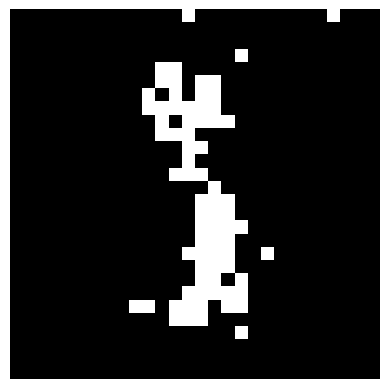

In [20]:
show_sample(img)